# Universidad del Tolima                                                   
## Facultad de Ingeniería Forestal 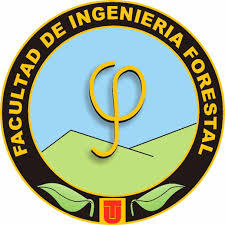
## Curso de hidrogeología y modelación de aguas subterráneas
## Unidad 1
## Práctico 3
## Modelacion de la interacción entre aguas superficiales
## y aguas subterráneas y su impacto en la planies inundables
##  (River Package y Mallado-Voronoi)

##Preparado por [Dr. Ing. Cristian Guevara-Ochoa]




In [ ]:
Celda 1: Descarga de herramientas necesarias para la simulación desde Google Drive.

In [ ]:
!gdown 'https://drive.google.com/uc?export=download&id=1qzeHA6Zg-I9BEnvLtup12MGR20swHhf_'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://drive.google.com/uc?export=download&id=1qzeHA6Zg-I9BEnvLtup12MGR20swHhf_
To: /content/mf6
100% 6.76M/6.76M [00:00<00:00, 158MB/s]


In [ ]:
Celda 2: Configuración de permisos de ejecución y copia de archivos binarios para simulaciones.

In [ ]:
!chmod 755 ./mf6
!cp ./mf6 /usr/local/bin


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 3: Instalación de la librería flopy para modelado de flujo subterráneo.

In [ ]:
pip install flopy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 4 y 5: Instalación de las librerías rasterio y fiona para manejo de datos geoespaciales.

In [ ]:
pip install rasterio

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install fiona

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 6: Importación de librerías necesarias y montaje de Google Drive para acceso a archivos.

In [ ]:
from scipy.interpolate import griddata

import rasterio

from shapely.geometry import Polygon, Point, MultiLineString, MultiPoint

import pandas as pd
import numpy as np
import geopandas as gpd

#plots
import matplotlib.pyplot as plt

#modflow
import flopy
import flopy.discretization as fgrid
import flopy.plot as fplot
from flopy.utils.gridintersect import GridIntersect
import flopy.utils.binaryfile as bf

import os, json

#import mplleaflet
from google.colab import drive
drive.mount('/content/drive')


import sys
sys.path.insert(0, '/content/drive/My Drive/src')
from meshProperties import mesh_shape
from geoVoronoi import createVoronoi
#Create mesh object
vorMesh = createVoronoi()

#Define base refinement and refinement levels
vorMesh.defineParameters(maxRef = 80, minRef=10, stages=5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

/--------Sumary of cell discretization-------/
Maximun refinement: 80.00 m.
Minimum refinement: 10.00 m.
Cell size list: [80.  62.5 45.  27.5 10. ] m.
/--------------------------------------------/



In [ ]:
Celda 7: Apertura y carga de capas de límites y definiciones de refinamiento para el modelo.

In [ ]:
#Open limit layers and refinement definition layers
vorMesh.addLimit('basin','/content/drive/My Drive/shp/ModelLimit1.shp')
vorMesh.addLayer('wells','/content/drive/My Drive/shp/ModelWell2.shp')
vorMesh.addLayer('river','/content/drive/My Drive/shp/ModelRiver2.shp')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 8: Importación de librería os para manejo de operaciones del sistema operativo.

In [ ]:
import os

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 9: Verificación y creación de una carpeta de salida para guardar los resultados.

In [ ]:
#check or create an output folder
outPath = '.C:/ConcursoUT/Propuestas/riverAquiferGeospatialGroundwaterModelVoronoiMesh/out/geospacial'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 10: Definición y creación de la estructura de carpetas para almacenar los resultados geoespaciales del modelo de Voronoi.

In [ ]:


# Definir la ruta de salida
outPath = 'c:/examples/out/geospacial'

# Crear la carpeta de salida y todas las carpetas intermedias si no existen
os.makedirs(outPath, exist_ok=True)
print(f'La carpeta de salida {outPath} ha sido creada o ya existía.')

# Proceder con la generación y exportación de datos de Voronoi
try:
    # Generar el arreglo de pares de puntos y la nube de puntos
    vorMesh.extractOrgVertices()
    vorMesh.createPointCloud()
    vorMesh.generateVoronoi()

    # Exportar puntos como shapefiles
    vorMesh.getPointsAsShp('vertexOrg', f'{outPath}/vertexOrg.shp')
    vorMesh.getPointsAsShp('vertexDist', f'{outPath}/vertexDist.shp')
    vorMesh.getPointsAsShp('vertexBuffer', f'{outPath}/vertexBuffer.shp')
    vorMesh.getPointsAsShp('vertexMaxRef', f'{outPath}/vertexMaxRef.shp')
    vorMesh.getPointsAsShp('vertexMinRef', f'{outPath}/vertexMinRef.shp')
    vorMesh.getPointsAsShp('vertexTotal', f'{outPath}/vertexTotal.shp')

    # Exportar los polígonos de Voronoi
    vorMesh.getPolyAsShp('voronoiRegions', f'{outPath}/voronoiRegions.shp')
    print("Exportación completada con éxito.")

except Exception as e:
    print("Ocurrió un error durante la generación o exportación de datos:", e)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


La carpeta de salida c:/examples/out/geospacial ha sido creada o ya existía.

/----Sumary of points for voronoi meshing----/
Distributed points from layers: 680
Points from layer buffers: 1360
Points from max refinement areas: 749
Points from min refinement areas: 1335
Total points inside the limit: 4090
/--------------------------------------------/

Time required for point generation: 5.51 seconds 

Exportación completada con éxito.


In [ ]:
#folium

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install fiona

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# DISV

In [ ]:
Celda 11: Cargar datos de malla desde un archivo shapefile. Usa la función mesh_shape para cargar el archivo voronoiRegions.shp, que contiene la geometría de las regiones Voronoi para el modelo.

In [ ]:
# get the mesh data from the shapefile
mesh=mesh_shape('C:/examples/out/geospacial/voronoiRegions.shp')
gridprops=mesh.get_gridprops_disv()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Creating a unique list of vertices [[x1,y1],[x2,y2],...]


100%|██████████| 4090/4090 [00:00<00:00, 9608.32it/s] 



Extracting cell2d data and grid index


100%|██████████| 4090/4090 [00:01<00:00, 2821.41it/s]


In [ ]:
Celda 12: Asignación de propiedades de malla. Extrae de gridprops las propiedades específicas de la malla: cell2d (celdas 2D), vertices (vértices), ncpl (número de celdas por capa), nvert (número de vértices) y centroids (centroides de cada celda).

In [ ]:
cell2d = gridprops['cell2d']
vertices = gridprops['vertices']
ncpl = gridprops['ncpl']
nvert = gridprops['nvert']
centroids=gridprops['centroids']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Geometria del Acuifero

In [ ]:
Celda 13: Parámetros de entrada para MODFLOW 6. Define las entradas para el modelo de flujo subterráneo, configurando así el ambiente de simulación para MODFLOW 6.

In [ ]:
#Extact dem values for each centroid of the voronois
src = rasterio.open('/content/drive/My Drive/rst/ModeloDem1Filled.tif')
elevation=[x for x in src.sample(centroids)]

nlay = 3

mtop=np.array([elev[0] for i,elev in enumerate(elevation)])

zbot=np.zeros((nlay,ncpl))

AcuifInf_Bottom = -120

AcuifMed_Bottom = AcuifInf_Bottom + (0.5 * (mtop - AcuifInf_Bottom))

AcuifSup_Bottom = AcuifInf_Bottom + (0.75 * (mtop - AcuifInf_Bottom))


zbot[0,] = AcuifSup_Bottom
zbot[1,] = AcuifMed_Bottom
zbot[2,] = AcuifInf_Bottom


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Creación del modelo Modflow 6

In [ ]:
Celdas creación del modelo Modflow 6: Configura los objetos necesarios para MODFLOW 6 y ejecuta el modelo. Esta etapa simula el flujo de agua en el sistema acuífero basado en los parámetros y las condiciones de contorno definidas.
Celda 14: Inicialización de la simulación en MODFLOW 6. Define el nombre del modelo, el espacio de trabajo y el ejecutable, y crea el objeto sim para gestionar la simulación.

In [ ]:
# create simulation
model_name = 'geo_model'
model_ws = '../examples/out/geospacial/model'
exe_name = '../exe/mf6.exe'

sim = flopy.mf6.MFSimulation(sim_name=model_name, version='mf6', exe_name=exe_name,sim_ws=model_ws)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 15: Creación del paquete de tiempos (tdis) en MODFLOW 6. Define el número de períodos de tiempo (nper) y los datos de duración (tdis_rc) para cada uno. Crea el paquete tdis, que establece la temporalidad de la simulación en segundos.

In [ ]:
# create tdis package

nper = 11
tdis_rc = [(1.0,1,1.0)] + [(200 * 86400.0, 4, 1.0) for a in range(nper -1)]

tdis=flopy.mf6.ModflowTdis(sim, nper=nper, time_units='seconds',perioddata=tdis_rc)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 16: Creación de la solución iterativa (ims). Define el método de aceleración lineal como BICGSTAB y registra la solución iterativa para el modelo de flujo (gwf) en la simulación sim.

In [ ]:
# create iterative model solution and register the gwf model with it
ims = flopy.mf6.ModflowIms(sim, linear_acceleration='BICGSTAB')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

Celda 17: Creación del modelo de flujo subterráneo (gwf). Define el modelo gwf en la simulación sim con el nombre model_name, habilita el guardado de flujos (save_flows=True) y activa opciones de relajación de Newton (newtonoptions=['under_relaxation']).

In [ ]:
# create gwf model
gwf = flopy.mf6.ModflowGwf(sim, modelname=model_name, save_flows=True, newtonoptions=['under_relaxation'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 18: Definición de la malla DISV. Crea el paquete de discretización en modo vertical (disv) para el modelo gwf, especificando el número de capas (nlay), el número de celdas por capa (ncpl), la elevación superior (top=mtop), la elevación de los fondos de cada capa (botm=zbot), y las propiedades de la malla (nvert, vertices, cell2d).

In [ ]:
# disv
disv = flopy.mf6.ModflowGwfdisv(gwf, nlay=nlay, ncpl=ncpl,top=mtop, botm=zbot,nvert=nvert, vertices=vertices,cell2d=cell2d)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 19: Configuración de condiciones iniciales (ic). Crea el paquete de condiciones iniciales (ModflowGwfic) para el modelo gwf, estableciendo los niveles iniciales de agua en todas las capas utilizando mtop como referencia para cada una

In [ ]:
ic = flopy.mf6.ModflowGwfic(gwf, strt=np.stack([mtop for i in range(nlay)]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 20: Definición de parámetros de flujo (npf). Configura el paquete de flujo de agua subterránea (ModflowGwfnpf) en el modelo gwf, asignando la conductividad hidráulica (Kx) para cada capa, el tipo de celdas (icelltype), y habilita el guardado de descarga específica (save_specific_discharge=True).

In [ ]:
Kx =[1E-5,5E-4,2E-4]
icelltype = [1,1,0]
npf = flopy.mf6.ModflowGwfnpf(gwf,save_specific_discharge=True,icelltype=icelltype,k=Kx)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

Celda 21: Configuración de almacenamiento (sto). Define el paquete de almacenamiento (ModflowGwfsto) para el modelo gwf, estableciendo el almacenamiento específico (ss=1e-05) y la porosidad efectiva (sy=0.15) para simular la capacidad de almacenamiento del acuífero.

In [ ]:
sto=flopy.mf6.ModflowGwfsto(gwf,ss=1e-05, sy=0.15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

Celda 22: Definición del paquete de evapotranspiración (evt). Configura el paquete ModflowGwfevta para el modelo gwf, estableciendo una tasa de evapotranspiración (rate=evtr), la superficie inicial (surface=mtop), y la profundidad de influencia (depth=1.0).

In [ ]:
evtr = 1.2/365/86400
evt = flopy.mf6.ModflowGwfevta(gwf,ievt=1,surface=mtop,rate=evtr,depth=1.0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 23: Visualización de la malla del modelo. Crea una figura y un eje para mostrar la vista en planta del modelo gwf utilizando PlotMapView, y dibuja la malla con líneas azules de grosor moderado (linewidth=0.5).

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


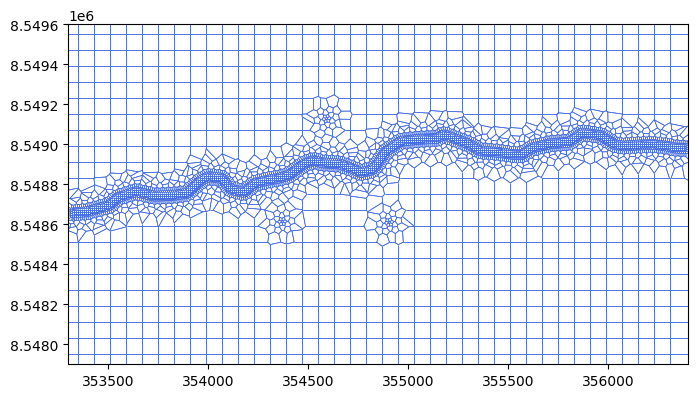

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
modelmap = flopy.plot.PlotMapView(model=gwf)
linecollection = modelmap.plot_grid(linewidth=0.5, color='royalblue')

In [ ]:
Celda 24: Visualización de la sección transversal del modelo. Define una línea de corte con coordenadas específicas (line) y crea una figura para mostrar una sección transversal del modelo gwf usando PlotCrossSection. Dibuja la malla a lo largo de esta línea para observar la estructura vertical del modelo.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


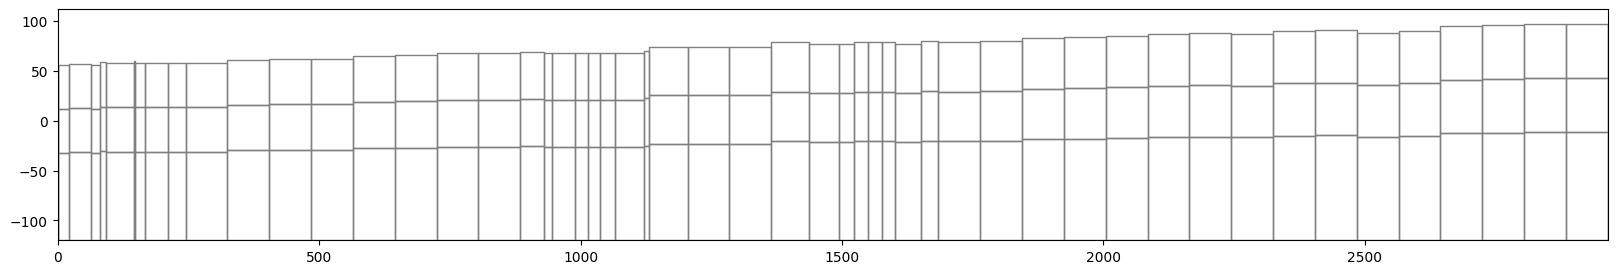

In [ ]:
line = np.array([(353304.219,8548577.580), (356374.790,8548586.576)])

fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(1, 1, 1)
modelxsect = flopy.plot.PlotCrossSection(model=gwf, line={"line": line})
linecollection = modelxsect.plot_grid()

## Para insertar las condiciones de recarga se realiza una interceptacion entre el shp de la zona de recarga y la grilla, de esta manera se optiene los indices de las celdas que conforman dicha zona

In [ ]:

Celda 25: Creación de la malla de vértices y preparación para la intersección. Define una malla VertexGrid (tgr) usando los vértices (vertices) y las celdas (cell2d). Luego, crea un objeto GridIntersect (ix2) que permite realizar intersecciones espaciales con la malla.

In [ ]:
tgr = fgrid.VertexGrid(vertices, cell2d)
ix2 = GridIntersect(tgr)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 26: Creación de la malla de vértices y preparación para la intersección. Define una malla VertexGrid (tgr) usando los vértices (vertices) y las celdas (cell2d). Luego, crea un objeto GridIntersect (ix2) que permite realizar intersecciones espaciales con la malla.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


# Cargar el archivo shapefile de la zona de recarga
zone1 = gpd.read_file('/content/drive/My Drive/shp/ModelRechargeZone1.shp')

# Suponiendo que ix2 es un índice espacial, realizamos la intersección
result = ix2.intersect(zone1['geometry'].loc[0])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Celda 27: Instalación de descartes y visualización de las celdas intersectadas. Muestra la malla tgr, resalta las celdas de la zona de recarga (result) y marca sus centroides con una "x" negra para verificar la intersección.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


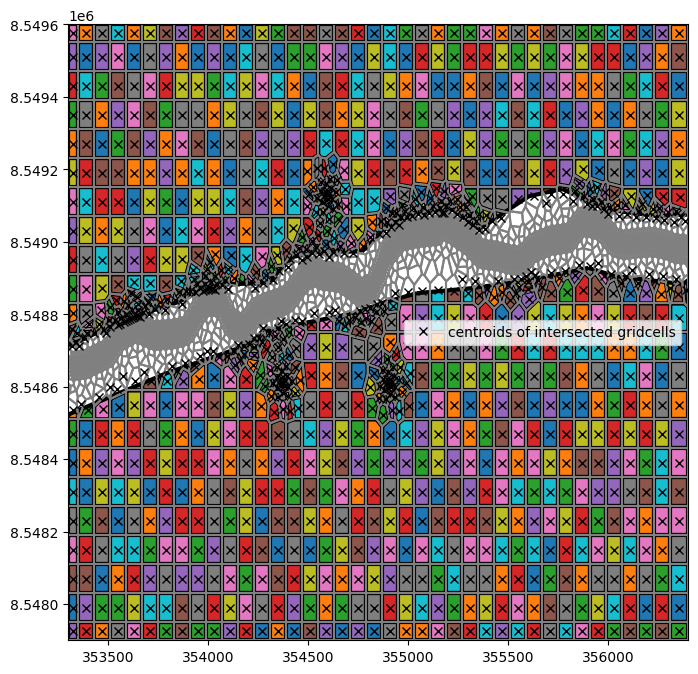

In [ ]:
# install descartes
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
pmv = fplot.PlotMapView(ax=ax, modelgrid=tgr)
pmv.plot_grid()
ix2.plot_polygon(result, ax=ax, lw=3)

for cellid in result.cellids:
    (h2,) = ax.plot(
        tgr.xcellcenters[cellid],
        tgr.ycellcenters[cellid],
        "kx",
        label="centroids of intersected gridcells",
    )

ax.legend([h2], [i.get_label() for i in [h2]], loc="best");

In [ ]:
Celda 28: Define los datos de recarga para el periodo de estrés. Calcula la tasa de recarga (rchr) y organiza los valores para cada celda en la zona de recarga en el diccionario rchr_spd.

In [ ]:
#stress_period_data : [cellid, elev, cond, aux, boundname]
rchr = 0.2/365/86400
rchr_list = []
for i in result.cellids:
    rchr_list.append([0,i,rchr])
rchr_spd = {0:rchr_list}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

Celda 29: Aplicación del paquete de recarga en el modelo. Utiliza ModflowGwfrch para asignar los datos de recarga (rchr_spd) al modelo gwf en el periodo de estrés especificado.

In [ ]:
rch = flopy.mf6.ModflowGwfrch(gwf, stress_period_data=rchr_spd)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Intersercción de pozos con la grilla

In [ ]:
Celda 30: Configuración del paquete de pozos. Carga el shapefile de pozos, identifica las celdas intersectadas en la malla, asigna la tasa de extracción (pump) y organiza los datos en well_spd. Aplica las condiciones de extracción en el modelo gwf usando ModflowGwfwel.

In [ ]:
well_zone=gpd.read_file('/content/drive/My Drive/shp/ModelWell2.shp')
list_wells=[]
for i in range(well_zone.shape[0]):

    list_wells.append(well_zone['geometry'].loc[i])

mp = MultiPoint(points=list_wells)

result=ix2.intersect(mp)

pump = -0.15
well_list = []
for i in result.cellids:
    well_list.append([1,i,pump])
well_spd = {1:well_list}

well=flopy.mf6.ModflowGwfwel(gwf,stress_period_data=well_spd)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Intersección del rio con la grilla

In [ ]:

Celda 31: Carga del shapefile de la zona del río. Usa geopandas para cargar la geometría de la zona del río desde el archivo ModelRiver2.shp, que contiene los datos necesarios para definir las condiciones de contorno relacionadas con el río en el modelo.

In [ ]:
river_zone=gpd.read_file('/content/drive/My Drive/shp/ModelRiver2.shp')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

Celda 32: Intersección de la malla con la geometría del río. Realiza una intersección espacial entre la malla (ix2) y la geometría de la zona del río (river_zone), identificando las celdas de la malla que están dentro de la zona del río para aplicar condiciones de contorno en esas ubicaciones.

In [ ]:
result=ix2.intersect(river_zone['geometry'].loc[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 33: Configura los datos de flujo del río. Crea river_list con la elevación, conductancia y profundidad para cada celda intersectada en la zona del río, y organiza estos datos en river_spd para el periodo de estrés 0.

In [ ]:
river_list = []
for i in result.cellids:
    river_list.append([0,i,mtop[i],0.01,mtop[i]-1])
river_spd = {0:river_list}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 34: Aplicación del paquete de río. Usa ModflowGwfriv para asignar las condiciones de flujo del río (river_spd) al modelo gwf en el periodo de estrés especificado.

In [ ]:
river=flopy.mf6.ModflowGwfriv(gwf,stress_period_data=river_spd)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Condición regional de gradiente hidráulico

In [ ]:
Celda 35: Carga del shapefile de la zona de contorno. Usa geopandas para cargar el archivo ModelGHB1.shp, que contiene la geometría de los límites de contorno para aplicar condiciones de borde generalizadas en el modelo.

In [ ]:
boundaries_zone=gpd.read_file('/content/drive/My Drive/shp/ModelGHB1.shp')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

Celda 36: Extrae geometrías de contorno y crea MultiLineString. Realiza la intersección con la malla (ix2) para identificar las celdas dentro de la zona de contorno.

In [ ]:
list_boundaries=[]
for i in range(boundaries_zone.shape[0]):

    list_boundaries.append(boundaries_zone['geometry'].loc[i])

mls = MultiLineString(lines=list_boundaries)
#intersec rivers with our grid
result=ix2.intersect(mls)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 37: Configura datos del paquete de borde generalizado (GHB). Crea ghb_list con las condiciones de borde según la ubicación de cada celda y organiza los datos en ghb_spd para el periodo de estrés 0.

In [ ]:
#[cellid, bhead, cond, aux, boundname]
ghb_list=[]

for idx in result.cellids:
    point=centroids[idx]
    if point[0]<354500:
         ghb_list.append([0,i,55,0.01])
    else:
         ghb_list.append([0,i,90,0.01])
ghb_spd={0:ghb_list}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

Celda 38: Aplicación del paquete de borde generalizado. Usa ModflowGwfghb para asignar las condiciones de borde (ghb_spd) al modelo gwf en el periodo de estrés especificado.

In [ ]:
ghb=flopy.mf6.ModflowGwfghb(gwf,stress_period_data=ghb_spd)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 39: Configuración del paquete de control de salida (OC). Define los archivos de salida para los datos de nivel de agua subterranea (hds) y de presupuesto (cbc) del modelo gwf. Usa ModflowGwfoc para guardar todos los registros de niveles (HEAD) y de presupuesto (BUDGET) durante la simulación.

In [ ]:
hname = '{}.hds'.format(model_name)
cname = '{}.cbc'.format(model_name)
oc = flopy.mf6.ModflowGwfoc(gwf, budget_filerecord=cname,
 head_filerecord=hname,
 saverecord=[('HEAD', 'ALL'), ('BUDGET',
'ALL')])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

Celda 40: Define el ejecutable, escribe los archivos de simulación y ejecuta MODFLOW 6 para correr la simulación.

In [ ]:
sim.exe_name = "/content/mf6"

sim.write_simulation()
sim.run_simulation()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...
  writing model geo_model...
    writing model name file...
    writing package disv...
    writing package ic...
    writing package npf...
    writing package sto...
    writing package evta_0...
    writing package rch_0...
    writing package wel_0...
    writing package riv_0...
    writing package ghb_0...
    writing package oc...
FloPy is using the following executable to run the model: ../../../../content/mf6
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.4.2 06/28/2023

        MODFLOW 6 compiled Sep  2 2023 11:53:03 with GCC version 11.4.0

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursu

(True, [])

# Plots

In [ ]:
Celda 41: Carga los datos de niveles (.hds), ajusta valores irreales y carga el archivo de presupuesto (.cbc) para análisis.

In [ ]:
hds = bf.HeadFile(model_ws+'/'+model_name + '.hds')
head = hds.get_data()
head[head==1e+30]=np.nan
cpth = os.path.join(model_ws, model_name+'.cbc')
cobj = flopy.utils.CellBudgetFile(cpth, precision=hds.precision)
spd = cobj.get_data(text='DATA-SPDIS')[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Celda 42: Muestra en planta los niveles de agua subterránea con contornos y barra de color para visualizar su distribución en el modelo.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


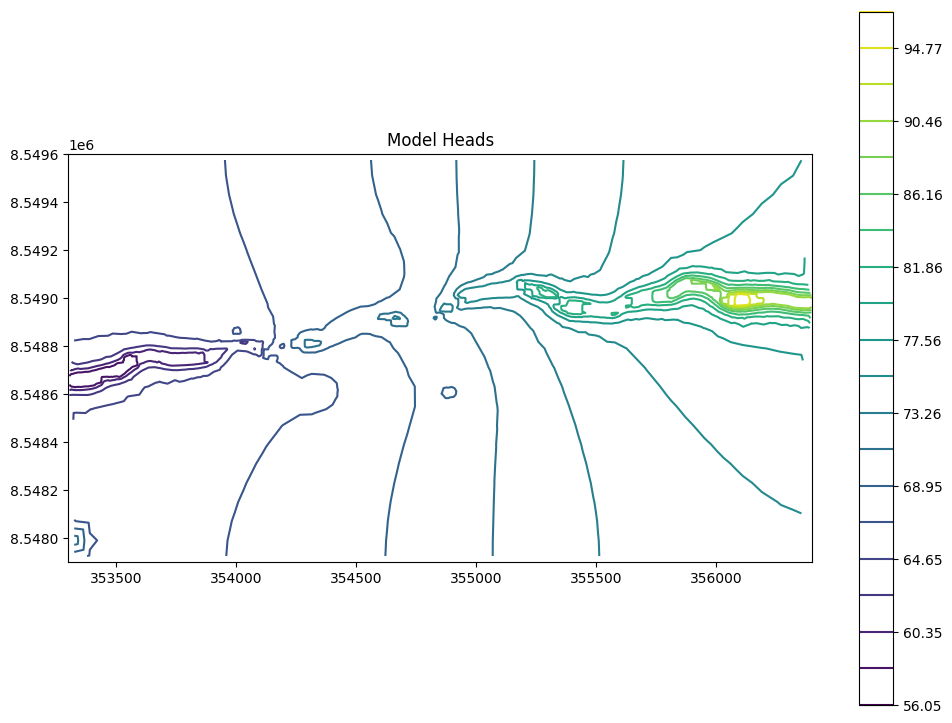

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
mapview = flopy.plot.PlotMapView(model=gwf)
#shp=flopy.plot.plot_shapefile('../examples/In/shp/Geospatial_model/ModelWell2.shp',ax=ax,radius=10)
#linecollection = mapview.plot_grid()

levels = np.linspace(np.nanmin(head),np.nanmax(head),num=20)
contour_set = mapview.contour_array(head,levels=levels)
t = ax.set_title("Model Heads")
plt.colorbar(contour_set, shrink=0.75)
plt.show()

In [ ]:
Celda 43: Muestra los niveles de agua subterránea con contornos blancos y una malla de colores semitransparente para una visualización detallada

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


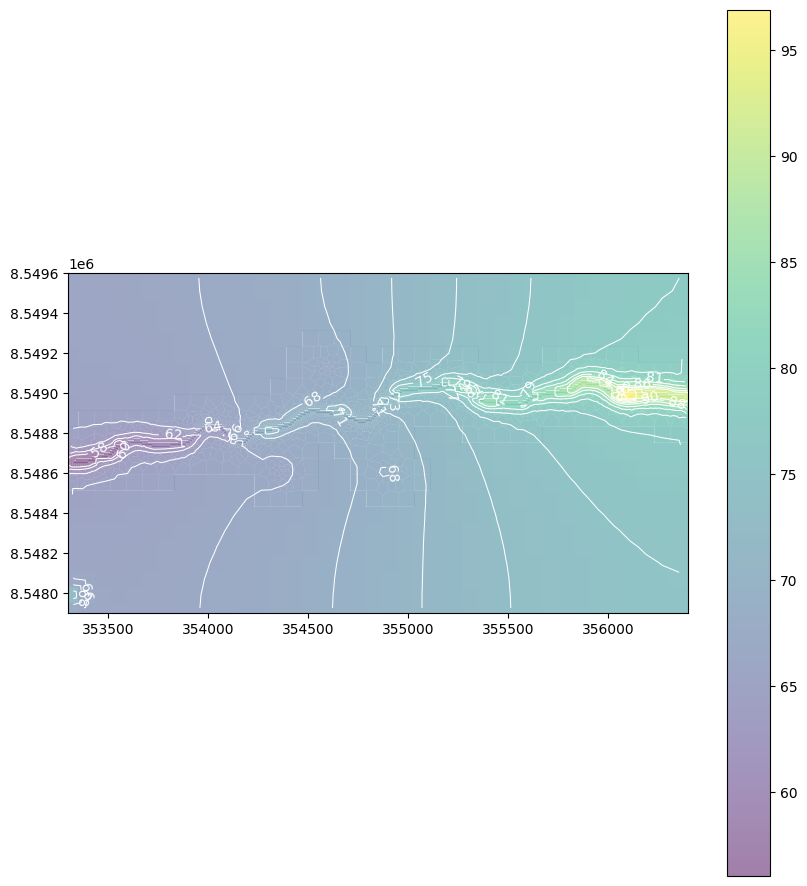

In [ ]:
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
mapview = flopy.plot.PlotMapView(model=gwf)

quadmesh = mapview.plot_array(head, alpha=0.5)
levels = np.linspace(np.nanmin(head),np.nanmax(head),num=20)
c = mapview.contour_array(head, linewidths=0.75,colors='white',levels=levels)
plt.clabel(c, fmt='%3d')
#quiver = flopy.plot.plotutil.c(spd)
plt.colorbar(quadmesh, shrink=0.75)
plt.show()

In [ ]:
Celda 44: Muestra los niveles de agua subterránea en una sección transversal, con la malla y barra de color.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


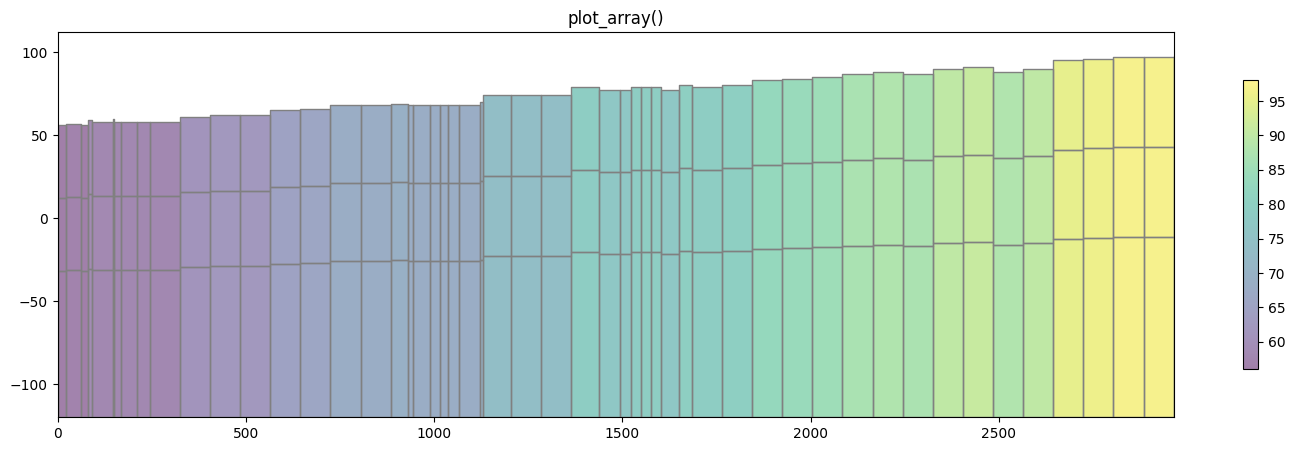

In [ ]:
# get the head output for stress period 1 from the modflow6 head file
head = flopy.utils.HeadFile(os.path.join(model_ws, model_name+".hds"))
hdata = head.get_alldata()[0, :, :, :]

fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("plot_array()")

xsect = flopy.plot.PlotCrossSection(model=gwf, line={"line": line})
patch_collection = xsect.plot_array(hdata, head=hdata, alpha=0.5)
line_collection = xsect.plot_grid()
cb = plt.colorbar(patch_collection, shrink=0.75)